# What's the Weather Like?

 1. Showcase Temperature (F) vs. Latitude (deg)
 2. Showcase Humidity (% H20) vs. Latitude (deg)
 3. Showcase Cloudiness (% coverage) vs. Latitude (deg)
 4. Showcase Wind Speed (mph) vs. Latitude (deg)
 
These plots are based on 500 unique cities, randomly selected.  Compete city API log in [city.log](./city_log.txt).  Full data in [weather.csv](./weather.csv).

Plotted using Matplotlib and Seaborn.  Uses [citypy](https://github.com/wingchen/citipy) for ease of selecting cities.

In [2]:
from citipy import citipy
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import requests
import seaborn as srn

import json
import logging
import time

srn.set()

In [3]:
logger = logging.getLogger('API calls')
logger.setLevel(logging.INFO)
fh = logging.FileHandler('city.log')
fh.setLevel(logging.INFO)
ch = logging.StreamHandler()
ch.setLevel(logging.ERROR)
logger.addHandler(fh)
logger.addHandler(ch)

In [7]:
np.random.seed(125)
lats = np.random.randint(-90, 90, size=500)
longs = np.random.randint(-180, 180, size=500)
coords = pd.DataFrame({"latitude": lats, "longitude": longs})
coords.head()

,latitude,longitude
0,67,-117
1,-3,11
2,-23,-146
3,20,-19
4,-47,6


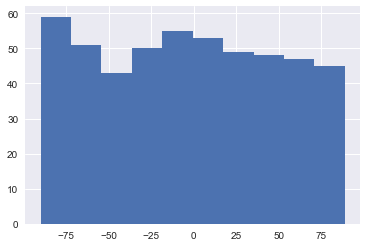

In [8]:
plt.hist(coords['latitude'])
plt.show()

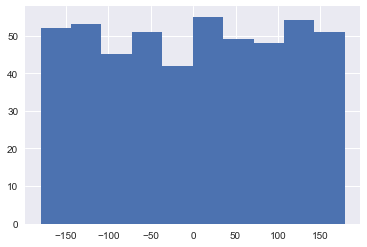

In [9]:
plt.hist(coords['longitude'])
plt.show()

In [18]:
from secrets import API_KEY
def get_weather_data(coords, time_between=1):
    """Hits OpenWeatherMap API to get weather data for coordinates.
    Coords is a dataframe of 2 columns: Latitude and Longitude.
    Returns a list of json responses.
    """
    results = []
    for ind, row in coords.iterrows():
        query = f"http://api.openweathermap.org/data/2.5/weather?lat={row['latitude']}&lon={row['longitude']}&APPID={API_KEY}"
        city = citipy.nearest_city(row['latitude'], row['longitude'])
        logger.info(f"Call {ind}: {city.city_name} ({query})")
        result = requests.get(query)
        results.append(result.json())
        time.sleep(time_between)
    return results


In [13]:
test = pd.DataFrame({"latitude": [37], "longitude": [-122]})
test_results = get_weather_data(test)
test_results

[{'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 37, 'lon': -122},
  'dt': 1522184280,
  'id': 5381421,
  'main': {'humidity': 45,
   'pressure': 1023,
   'temp': 293.87,
   'temp_max': 295.15,
   'temp_min': 291.15},
  'name': 'Pasatiempo',
  'sys': {'country': 'US',
   'id': 512,
   'message': 0.164,
   'sunrise': 1522159177,
   'sunset': 1522204017,
   'type': 1},
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
    'icon': '01d',
    'id': 800,
    'main': 'Clear'}],
  'wind': {'deg': 200, 'speed': 3.6}}]

In [22]:
# Commenting out so I don't accidentally hit the API 500 more times.
# full_results = get_weather_data(coords)
# full_results[:3]

[{'base': 'stations',
  'clouds': {'all': 36},
  'cod': 200,
  'coord': {'lat': 76, 'lon': 169},
  'dt': 1522188523,
  'id': 0,
  'main': {'grnd_level': 1025.9,
   'humidity': 88,
   'pressure': 1025.9,
   'sea_level': 1025.86,
   'temp': 251.87,
   'temp_max': 251.87,
   'temp_min': 251.87},
  'name': '',
  'sys': {'message': 0.0049, 'sunrise': 1522086642, 'sunset': 1522137091},
  'weather': [{'description': 'scattered clouds',
    'icon': '03n',
    'id': 802,
    'main': 'Clouds'}],
  'wind': {'deg': 299.501, 'speed': 1.32}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 12, 'lon': 86},
  'dt': 1522188531,
  'id': 0,
  'main': {'grnd_level': 1023.87,
   'humidity': 100,
   'pressure': 1023.87,
   'sea_level': 1023.88,
   'temp': 301.095,
   'temp_max': 301.095,
   'temp_min': 301.095},
  'name': '',
  'sys': {'message': 0.1637, 'sunrise': 1522109722, 'sunset': 1522153624},
  'weather': [{'description': 'clear sky',
    'icon': '01n',
    'id': 800,
 

In [23]:
# Save the data out in case the world blows up
# Commenting out so I don't accidentally overwrite my data
# with open("weather.json", "w") as outfile:
#     json.dump(full_results, outfile)


In [25]:
def k_to_f(temp):
    """Converts a Kelvin temperature to Fahrenheit"""
    return temp * 9/5 - 459.67

def mps_to_mph(speed):
    """converts meters per second to miles per hour"""
    return speed * 2.23694

In [26]:
important_json_data = []
for point in full_results:
    lat = point['coord']['lat']
    long = point['coord']['lon']
    temp = k_to_f(point['main']['temp'])
    humidity = point['main']['humidity']
    cloudiness = point['clouds']['all']
    wind = mps_to_mph(point['wind']['speed'])
    important_json_data.append([
        lat, long, temp, humidity, cloudiness, wind
    ])
weather_df = pd.DataFrame(important_json_data)
weather_df.columns = ["lat", "long", "temp", "humidity", "clouds", "wind"]
weather_df.head()

,lat,long,temp,humidity,clouds,wind
0,76,169,-6.304,88,36,2.952761
1,12,86,82.301,100,0,4.406772
2,31,175,63.581,100,36,27.670948
3,-6,-129,77.801,100,0,11.788674
4,8,-70,93.686,44,32,6.867406


In [47]:
# Commented out to avoid overwriting data
# weather_df.to_csv("weather.csv")

## 1. Temperature vs. Latitude

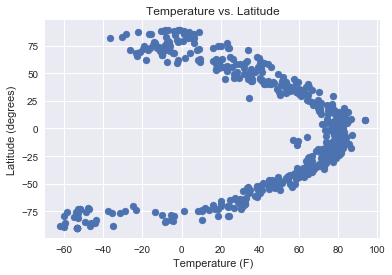

In [41]:
plt.scatter(weather_df.temp, weather_df.lat)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude (degrees)")
plt.title("Temperature vs. Latitude")
plt.show()

There is a very clear correlation between temperature and latitude, with the warmest temperatures averaging approximately 80 degrees F at the equator and dropping off below zero at the poles.

## 2. Humidity vs. Latitude

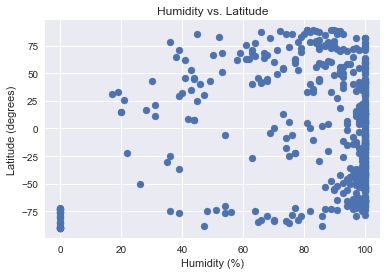

In [43]:
plt.scatter(weather_df.humidity, weather_df.lat)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Humidity vs. Latitude")
plt.show()

There doesn't seem to be much of a correlation between humidity and latitude.  I might have expected the equator to be much more humid than the poles based on the ability of air to absorb moisture at higher temperatures.  A couple Google results suggest there may be an issue with the Open Weather API's humidity data.  More study probably required.

## 3. Cloudiness vs. Latitude

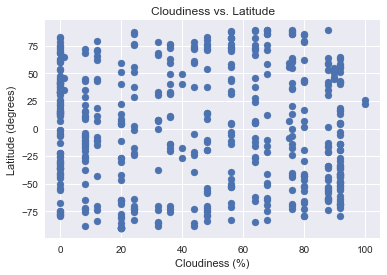

In [42]:
plt.scatter(weather_df.clouds, weather_df.lat)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Cloudiness vs. Latitude")
plt.show()

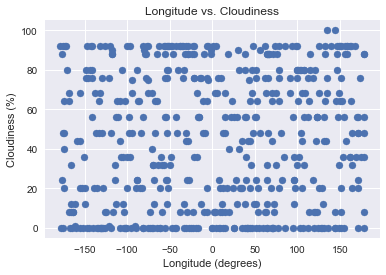

In [44]:
plt.scatter(weather_df.long, weather_df.clouds)
plt.xlabel("Longitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title("Longitude vs. Cloudiness")
plt.show()

There doesn't seem to be much of a correlation between cloudiness and latitude -- or longitude, for that matter.  It seems pretty evenly spread out.

## 4. Wind Speed vs. Latitude

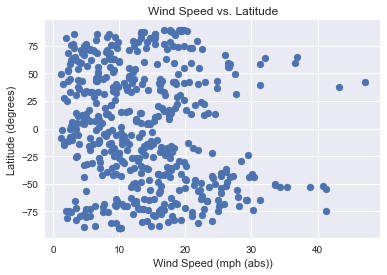

In [45]:
plt.scatter(weather_df.wind, weather_df.lat)
plt.xlabel("Wind Speed (mph (abs))")
plt.ylabel("Latitude (degrees)")
plt.title("Wind Speed vs. Latitude")
plt.show()

![Global wind patterns](wind-patterns.png)

There seems to be some correlation between wind speed and latitude.  I've included a theoretical global wind pattern image from wikipedia [link](https://en.wikipedia.org/wiki/Global_wind_patterns) for comparison.  The green areas are supposed to be areas of low wind speed generally.  It seems possible that these patterns are reflected in our data, with spikes in wind speed at -50 and 50 degrees latitude and slowdowns at approximately -75, 0, and 75 degrees.  Neat!

## Appendix

In [46]:
# API Log data
with open("city.log", "r") as f:
    print(f.read())


Call 0: pevek (http://api.openweathermap.org/data/2.5/weather?lat=76&lon=169&APPID=3d2e93d0c041ca648839058021e3afe2)
Call 1: kattivakkam (http://api.openweathermap.org/data/2.5/weather?lat=12&lon=86&APPID=3d2e93d0c041ca648839058021e3afe2)
Call 2: nikolskoye (http://api.openweathermap.org/data/2.5/weather?lat=31&lon=175&APPID=3d2e93d0c041ca648839058021e3afe2)
Call 3: atuona (http://api.openweathermap.org/data/2.5/weather?lat=-6&lon=-129&APPID=3d2e93d0c041ca648839058021e3afe2)
Call 4: barinas (http://api.openweathermap.org/data/2.5/weather?lat=8&lon=-70&APPID=3d2e93d0c041ca648839058021e3afe2)
Call 5: limbe (http://api.openweathermap.org/data/2.5/weather?lat=4&lon=9&APPID=3d2e93d0c041ca648839058021e3afe2)
Call 6: zhaoyang (http://api.openweathermap.org/data/2.5/weather?lat=33&lon=120&APPID=3d2e93d0c041ca648839058021e3afe2)
Call 7: arraial do cabo (http://api.openweathermap.org/data/2.5/weather?lat=-41&lon=-28&APPID=3d2e93d0c041ca648839058021e3afe2)
Call 8: arraial do cabo (http://api.open